# Q4 a

Performance with change in Kernel :
Linear kernel gives best result among all the kernels for all k values. 

Performance with change in c :
There is no effect of the value of C for Linear kernel. This means data is well seperated. 
Performance become better for 'rbf', 'sigmoid' kernel with increase in C. 

Performance with change in epsilon :
As the epsilon increases, performance of linear kernel degrades. 
For other kernels, performance remains nearly same.  

# Q4 b

#  Observations : 
# Similarity between SVM and LDA in problem formulation

i.	LDA project the data such that there is maximum separation between any two cluster and minimum variance in each cluster. on other side SVM project the data and maximize the margin between two cluster. 

Difference between SVM and LDA in problem formulation 

i.	SVM projects the data to higher dimensional space. Whereas LDA projects the data to lower dimensional. 

ii.	SVM is use nonlinear basis for projecting the data. Whereas LDA projects the data linearly. 

iii.	SVM is flexible as it uses slack variables. Whereas LDA does not have such flexibility. 

# Performance with change in k 

Similarity between SVM and LDA in performance

i.	Performance degrades when K is decrease to below some limit for both LDA and SVM 

Difference between SVM and LDA in performance

i.	For LDA, K> 10 performance is constant. whereas Performance is not constant for SVM. We can predict whether SVM perform well or not. (bar plot in notebook shows this behaviour)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Required Functions

In [2]:
def Accuracy(label_true, label_pred):
    label_true = np.reshape(np.array(label_true ),(len(label_true ),1))
    label_pred = np.reshape(np.array(label_pred ),(len(label_pred ),1))
    n_p = label_pred.shape[0]
    print("Number of prediction: ",n_p)
    cp = np.sum(np.abs(label_pred-label_true))
    print("Number of wrong predictions: ",cp)
    accuracy = (n_p-cp)*100/n_p
    print("Accuracy: ",accuracy)
    return accuracy

In [3]:
def displayPlot(x,y,lab,loca,xlab,ylab,title):
    plt.figure
    plt.plot(x,y,label=lab)    
    plt.legend(loc=loca)
    plt.xlabel(xlab,size=12)
    plt.ylabel(ylab,size=12)
    plt.title(title,size=15)
    plt.savefig(lab+'.png')
    plt.show()

# Reading data

In [4]:
# Loading Training data
list_train = os.listdir(r".\emotion_classification\\train")
training_data = np.array([plt.imread(r'.\emotion_classification\\train\\' + x).flatten(order='F') for x in list_train]).T
D,n = training_data.shape[0],training_data.shape[1]
training_data_class= []
for x in list_train:
    if 'happy' in x:
        training_data_class.append(1)
    else:
        training_data_class.append(0)
tr_mean = np.reshape(np.mean(training_data, axis = 1),(D,1))

In [5]:
# Loading Testing data
list_test = os.listdir(r".\emotion_classification\\test")
testing_data = np.array([plt.imread(r'.\emotion_classification\\test\\' + x).flatten(order='F') for x in list_test]).T
testing_data_class= []
for x in list_test:
    if 'happy' in x:
        testing_data_class.append(1)
    else:
        testing_data_class.append(0)

In [6]:
print(training_data.shape)
print(testing_data.shape)

(10201, 20)
(10201, 10)


# PCA 

In [7]:
k = 15
pca = PCA(n_components = k)
training_PCA = pca.fit_transform(training_data.T)
print("Shape of training data after PCA transformation ", training_PCA.shape)
test_PCA = pca.transform(testing_data.T)
print("Shape of testing data after PCA transformation ", test_PCA.shape)

Shape of training data after PCA transformation  (20, 15)
Shape of testing data after PCA transformation  (10, 15)


In [8]:
print("Class label size",len(training_data_class))

Class label size 20


# Q4 a Solution:

# Performance with change in Kernel

In [9]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
Accuracy_svm_Kernel = []
Accuracy_lda_c = []
k =12
e = 0.0001
c= 0.001
for ker in kernel_list:
   # print(c)
#    print("**************************************************************************************")
    #******************************* PCA *****************************************************
    pca = PCA(n_components = k)
    training_PCA = pca.fit_transform(training_data.T)
  #  print("Shape of training data after PCA transformation ", training_PCA.shape)
    test_PCA = pca.transform(testing_data.T)
  #  print("Shape of testing data after PCA transformation ", test_PCA.shape)
   
    #******************************* SVM ******************************************************
    print("******************************* SVM ******************************************************")
    print("Tolerance is ",e)
    svm_model = svm.SVC(kernel=ker,C=c, tol = e)
    svm_model.fit(training_PCA,training_data_class)
    y_predict_train_svm = svm_model.predict(training_PCA)
    print("K is ",k)
    print("Used kernel-:", ker)
    y_predict_test_svm = svm_model.predict(test_PCA)
    print("Performance of method")
    accuracy_svm = Accuracy(np.array(testing_data_class),y_predict_test_svm)
    Accuracy_svm_Kernel.append(accuracy_svm)

******************************* SVM ******************************************************
Tolerance is  0.0001
K is  12
Used kernel-: linear
Performance of method
Number of prediction:  10
Number of wrong predictions:  1
Accuracy:  90.0
******************************* SVM ******************************************************
Tolerance is  0.0001
K is  12
Used kernel-: poly
Performance of method
Number of prediction:  10
Number of wrong predictions:  6
Accuracy:  40.0
******************************* SVM ******************************************************
Tolerance is  0.0001
K is  12
Used kernel-: rbf
Performance of method
Number of prediction:  10
Number of wrong predictions:  6
Accuracy:  40.0
******************************* SVM ******************************************************
Tolerance is  0.0001
K is  12
Used kernel-: sigmoid
Performance of method
Number of prediction:  10
Number of wrong predictions:  6
Accuracy:  40.0


['linear', 'poly', 'rbf', 'sigmoid']
[90.0, 40.0, 40.0, 40.0]


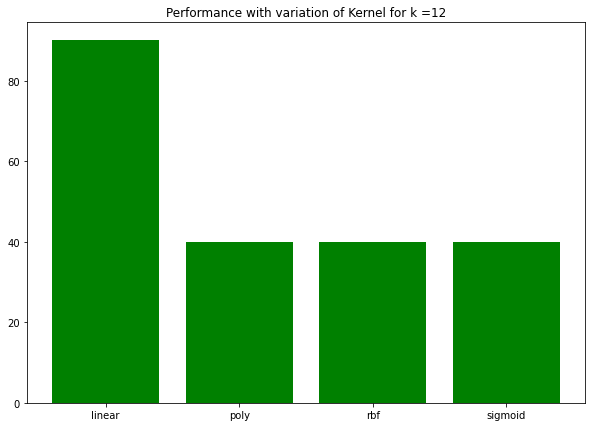

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

print(kernel_list )
print(Accuracy_svm_Kernel)
# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(kernel_list, Accuracy_svm_Kernel,color ='g')
plt.title("Performance with variation of Kernel for k ="+str(k))
# Show Plot
plt.show()


# Performance with change in C

In [11]:
k= 10 
pca = PCA(n_components = k)
training_PCA = pca.fit_transform(training_data.T)
print("Shape of training data after PCA transformation ", training_PCA.shape)
test_PCA = pca.transform(testing_data.T)
print("Shape of testing data after PCA transformation ", test_PCA.shape)
C_ = [ 0.001, 0.01, 0.1, 0.2, 0.5, 0.75, 1, 1.5, 2,10, 15,50,100]
accuracy_list_C = {}
for k in kernel_list:
    accuracy_list_C[k] = []
    print("\nkernel is ", k)
    for i in C_:
        #accuracy_list_C[k].append(accuracy_func(SVM_C(kernel_=k, Ct=i), test_PCA))
        SVM_model = svm.SVC(kernel=k, C=i)
        SVM_model.fit(training_PCA, training_data_class)
        print("c is ", c)
        accuracy_list_C[k].append(Accuracy(SVM_model.predict(test_PCA),testing_data_class))

Shape of training data after PCA transformation  (20, 10)
Shape of testing data after PCA transformation  (10, 10)

kernel is  linear
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
c is  

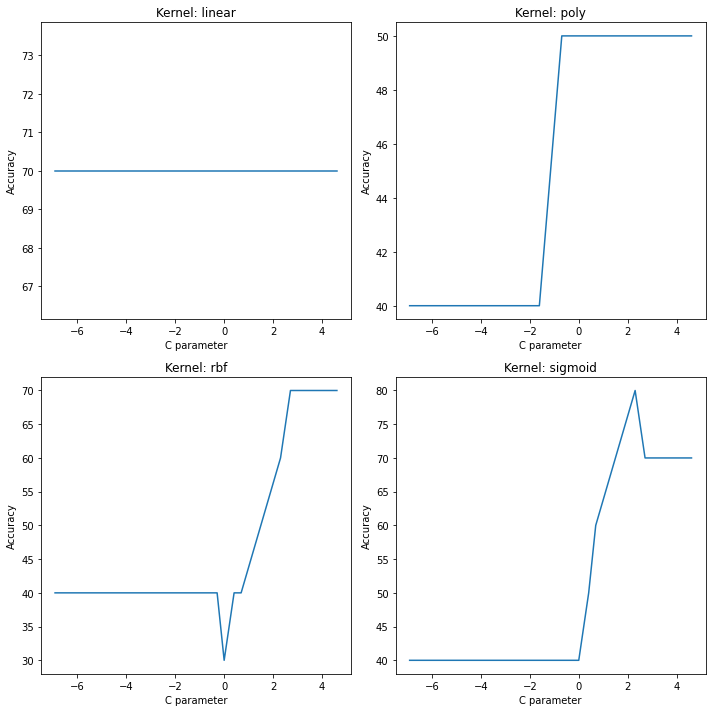

In [12]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(4):
    axes[i//2][i%2].plot(np.log(C_), (accuracy_list_C[kernel_list[i]]))
    axes[i//2][i%2].set_xlabel('C parameter')
    axes[i//2][i%2].set_ylabel('Accuracy')
    axes[i//2][i%2].set_title('Kernel: '+kernel_list[i])
plt.tight_layout()

# Performance with change in epsilon

In [13]:
k= 10 
pca = PCA(n_components = k)
training_PCA = pca.fit_transform(training_data.T)
print("Shape of training data after PCA transformation ", training_PCA.shape)
test_PCA = pca.transform(testing_data.T)
print("Shape of testing data after PCA transformation ", test_PCA.shape)
e_ = [ 0.001, 0.01, 0.1, 0.2, 0.5, 0.75, 1, 1.5, 2,10, 15,50,100]
accuracy_list_e = {}
for k in kernel_list:
    accuracy_list_e[k] = []
    print("\nkernel is ", k)
    for i in e_:
        #accuracy_list_C[k].append(accuracy_func(SVM_C(kernel_=k, Ct=i), test_PCA))
        SVM_model = svm.SVC(kernel=k, tol=i)
        SVM_model.fit(training_PCA, training_data_class)
        print("e is ", i)
        accuracy_list_e[k].append(Accuracy(SVM_model.predict(test_PCA),testing_data_class))

Shape of training data after PCA transformation  (20, 10)
Shape of testing data after PCA transformation  (10, 10)

kernel is  linear
e is  0.001
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  0.01
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  0.1
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  0.2
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  0.5
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  0.75
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  1
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  1.5
Number of prediction:  10
Number of wrong predictions:  3
Accuracy:  70.0
e is  2
Number of prediction:  10
Number of wrong predictions:  2
Accuracy:  80.0
e is  10
Number of prediction:  10
Number of wrong predictions:  4
Accuracy:  60.0
e is  15
Number of predicti

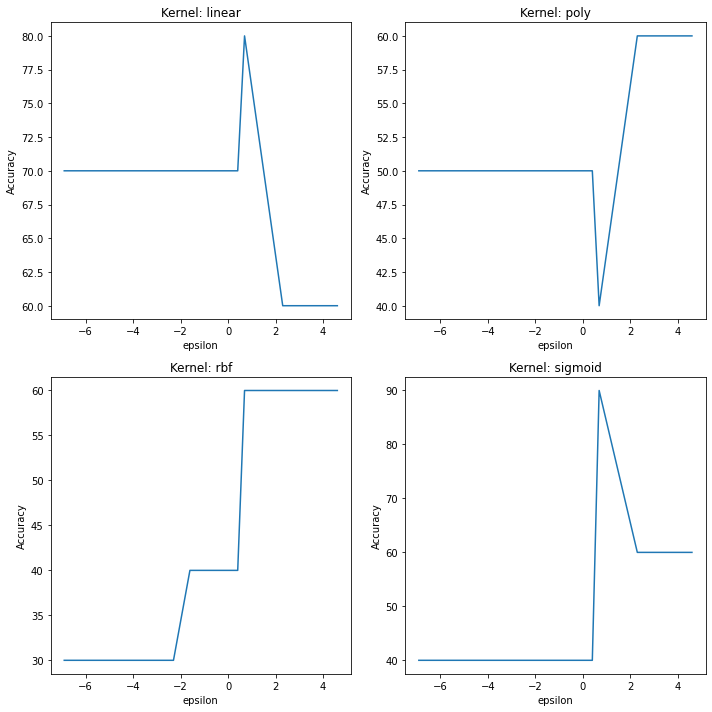

In [14]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
for i in range(4):
    axes[i//2][i%2].plot(np.log(e_), (accuracy_list_e[kernel_list[i]]))
    axes[i//2][i%2].set_xlabel('epsilon')
    axes[i//2][i%2].set_ylabel('Accuracy')
    axes[i//2][i%2].set_title('Kernel: '+ kernel_list[i])
plt.tight_layout()

# Performace with change in K

In [15]:
K = np.linspace(5,15,11)
Accuracy_svm = []
Accuracy_lda = []
for k in K:
    print("**************************************************************************************")
    #******************************* PCA *****************************************************
    k = int(k)
    pca = PCA(n_components = k)
    training_PCA = pca.fit_transform(training_data.T)
    print("Shape of training data after PCA transformation ", training_PCA.shape)
    test_PCA = pca.transform(testing_data.T)
    print("Shape of testing data after PCA transformation ", test_PCA.shape)
   
    #******************************* SVM ******************************************************
    print("******************************* SVM ******************************************************")
    svm_model = svm.SVC(kernel='linear',C=1)
    svm_model.fit(training_PCA,training_data_class)
    y_predict_train_svm = svm_model.predict(training_PCA)
    print("K is ",k)
    print("Used kernel-: Linear Kernel\n")
    y_predict_test_svm = svm_model.predict(test_PCA)
    print("Testing data results:")

    print("Performance of SVM method")
    accuracy_svm = Accuracy(np.array(testing_data_class),y_predict_test_svm)
    Accuracy_svm.append(accuracy_svm)
    
    #******************************** LDA ******************************************************
    print("******************************** LDA ******************************************************")
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(training_PCA,training_data_class)
    y_predict_train_lda = (lda_model.predict(training_PCA))
    y_predict_test_lda = (lda_model.predict(test_PCA))
    print("Testing data results")
    print("Performance of method")
    accuracy_lda = Accuracy(np.array(testing_data_class),y_predict_test_lda)
    Accuracy_lda.append(accuracy_lda)


**************************************************************************************
Shape of training data after PCA transformation  (20, 5)
Shape of testing data after PCA transformation  (10, 5)
******************************* SVM ******************************************************
K is  5
Used kernel-: Linear Kernel

Testing data results:
Performance of SVM method
Number of prediction:  10
Number of wrong predictions:  2
Accuracy:  80.0
******************************** LDA ******************************************************
Testing data results
Performance of method
Number of prediction:  10
Number of wrong predictions:  4
Accuracy:  60.0
**************************************************************************************
Shape of training data after PCA transformation  (20, 6)
Shape of testing data after PCA transformation  (10, 6)
******************************* SVM ******************************************************
K is  6
Used kernel-: Linear Kernel

Testing data 

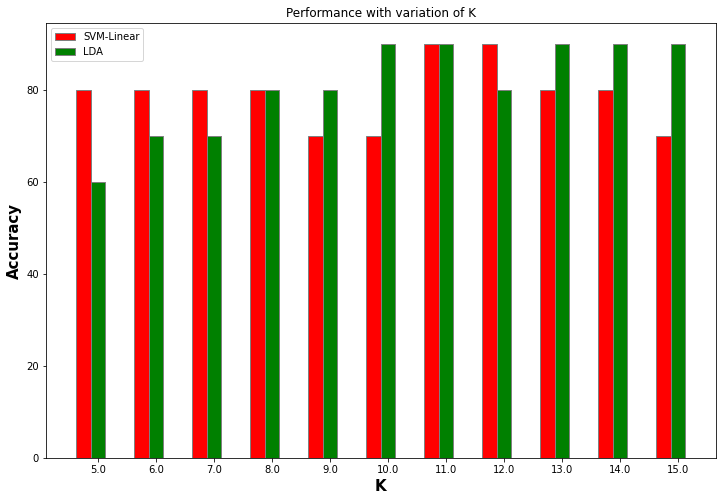

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))



# Set position of bar on X axis
br1 = np.arange(len(Accuracy_svm))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Accuracy_svm, color ='r', width = barWidth,edgecolor ='grey', label ='SVM-Linear')
plt.bar(br2, Accuracy_lda, color ='g', width = barWidth,edgecolor ='grey', label ='LDA')
#plt.bar(br3, CSE, color ='b', width = barWidth,edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('K', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy_svm))],K)
plt.title("Performance with variation of K")
plt.legend()
plt.show()


In [17]:
Accuracy_lda = np.array(Accuracy_lda)
Accuracy_svm = np.array(Accuracy_svm)
print(K)
print(Accuracy_svm)
print(Accuracy_lda)

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[80. 80. 80. 80. 70. 70. 90. 90. 80. 80. 70.]
[60. 70. 70. 80. 80. 90. 90. 80. 90. 90. 90.]


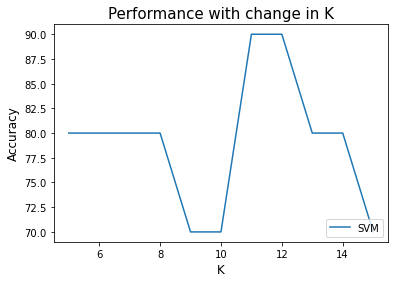

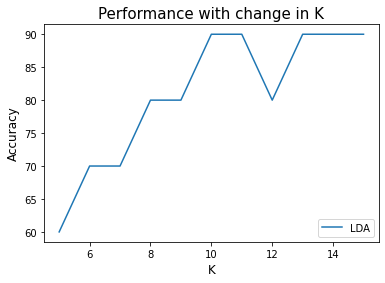

In [18]:
displayPlot(K,Accuracy_svm,"SVM","lower right","K","Accuracy", "Performance with change in K")
displayPlot(K,Accuracy_lda,"LDA","lower right","K","Accuracy", "Performance with change in K")